FIRST TASK

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('test.xlsx')

In [3]:
# Display the first few rows and shape of the datasets
print("Training Data Head:")
print(train_data.head())
print("Training Data Shape:", train_data.shape)

print("\nTest Data Head:")
print(test_data.head())
print("Test Data Shape:", test_data.shape)


Training Data Head:
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75  -63   
1 -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63  -53   
2 -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60  -68   
3 -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72  -95   
4 -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66  -71   

   T18 target  
0  -77    B37  
1  -63    B61  
2  -77    A19  
3  -73    A22  
4  -80    A33  
Training Data Shape: (36752, 19)

Test Data Head:
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -76 -83 -70 -66 -64 -72 -64 -69 -60  -76  -83  -78  -81  -81  -81  -70  -60   
1 -58 -57 -78 -81 -73 -73 -78 -78 -82  -49  -55  -58  -66  -79  -72  -83  -74   
2 -70 -70 -71 -69 -69 -68 -61 -55 -53  -82  -87  -76  -68  -57  -64  -75  -57   
3 -71 -61 -56 -56 -61 -

In [4]:
# Preprocess the data
# Handle missing values (if any)
train_data = train_data.dropna()
test_data = test_data.dropna()

In [6]:
# Select only numeric columns for clustering
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
train_data_numeric = train_data[numeric_cols]
test_data_numeric = test_data[numeric_cols]

# Display the first few rows and shape of the numeric datasets
print("\nNumeric Training Data Head:")
print(train_data_numeric.head())
print("Numeric Training Data Shape:", train_data_numeric.shape)

print("\nNumeric Test Data Head:")
print(test_data_numeric.head())
print("Numeric Test Data Shape:", test_data_numeric.shape)


Numeric Training Data Head:
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75  -63   
1 -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63  -53   
2 -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60  -68   
3 -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72  -95   
4 -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66  -71   

   T18  
0  -77  
1  -63  
2  -77  
3  -73  
4  -80  
Numeric Training Data Shape: (36752, 18)

Numeric Test Data Head:
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -76 -83 -70 -66 -64 -72 -64 -69 -60  -76  -83  -78  -81  -81  -81  -70  -60   
1 -58 -57 -78 -81 -73 -73 -78 -78 -82  -49  -55  -58  -66  -79  -72  -83  -74   
2 -70 -70 -71 -69 -69 -68 -61 -55 -53  -82  -87  -76  -68  -57  -64  -75  -57   
3 -71 -61 -56 -56 -61 -60 -68 -66 -72  -

In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data_numeric)
scaled_test_data = scaler.transform(test_data_numeric)

In [8]:
# Determine the optimal number of clusters using the Elbow method and Silhouette score
inertia_values = []
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_train_data)
    
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_train_data, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(scaled_train_data, kmeans.labels_))


c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\clust

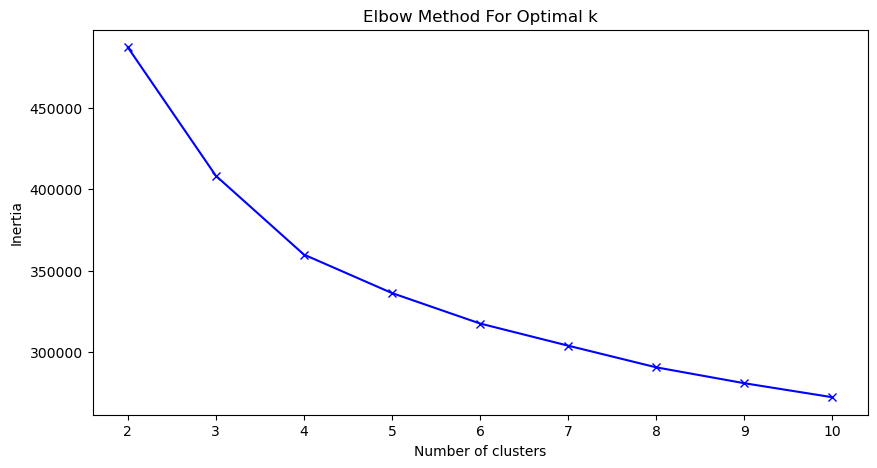

In [9]:
# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

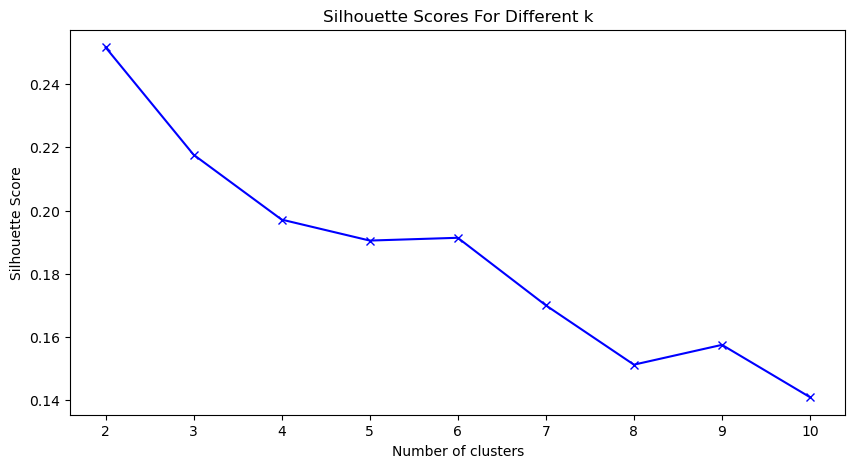

In [10]:
# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.show()

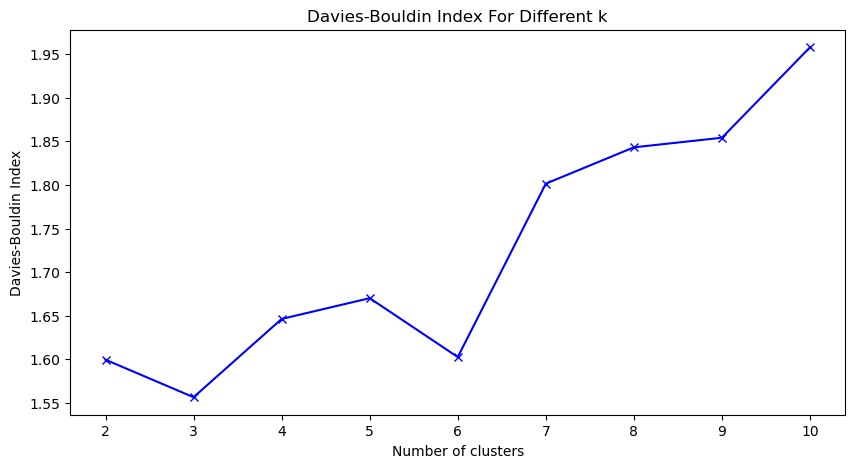

In [11]:
# Plotting the Davies-Bouldin Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, davies_bouldin_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index For Different k')
plt.show()

In [12]:
# Choose an optimal number of clusters (from the plots, choose the best k)
optimal_k = 3  # This should be chosen based on the Elbow and Silhouette analysis

# Fit the model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_train_data)

# Add the cluster labels to the train dataset
train_data['Cluster'] = kmeans.labels_

# Recalculate performance metrics for the optimal number of clusters
silhouette_avg = silhouette_score(scaled_train_data, kmeans.labels_)
inertia = kmeans.inertia_
davies_bouldin = davies_bouldin_score(scaled_train_data, kmeans.labels_)

print("\nPerformance Metrics for Training Data with Optimal k:")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Inertia: {inertia}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Performance Metrics for Training Data with Optimal k:
Silhouette Score: 0.21764539877685388
Inertia: 408315.69164342707
Davies-Bouldin Index: 1.556546095449236


In [13]:
# Function to predict the cluster for a new data point
def predict_cluster(new_data_point, scaler, kmeans):
    # Scale the new data point
    scaled_new_data_point = scaler.transform([new_data_point])
    # Predict the cluster
    cluster = kmeans.predict(scaled_new_data_point)
    return cluster[0]

# Predict clusters for the test dataset
test_data['Cluster'] = test_data_numeric.apply(lambda row: predict_cluster(row.values, scaler, kmeans), axis=1)
print(test_data['Cluster'])

c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid f

0        2
1        0
2        2
3        1
4        2
        ..
15747    2
15748    1
15749    2
15750    1
15751    2
Name: Cluster, Length: 15752, dtype: int32


c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
# Function to explain why a data point belongs to a particular cluster
def explain_cluster(new_data_point, cluster, kmeans, scaler):
    cluster_centers = kmeans.cluster_centers_
    scaled_new_data_point = scaler.transform([new_data_point])
    distances = np.linalg.norm(scaled_new_data_point - cluster_centers, axis=1)
    
    explanation = f"The new data point is closest to cluster {cluster} with a distance of {distances[cluster]}.\n"
    explanation += f"Cluster {cluster} center: {cluster_centers[cluster]}"
    
    return explanation

In [15]:
# Example of explaining why a test data point belongs to the predicted cluster
example_test_point = test_data_numeric.iloc[0, :].values  # Example: Using the first row of the test dataset as an example
predicted_cluster = test_data.iloc[0, -1]
explanation = explain_cluster(example_test_point, predicted_cluster, kmeans, scaler)
print(f"\nThe test data point belongs to cluster: {predicted_cluster}")
print(explanation)



The test data point belongs to cluster: 2
The new data point is closest to cluster 2 with a distance of 3.9632282174583757.
Cluster 2 center: [-0.75784519 -0.80096698 -0.69396492 -0.5041392  -0.21402083 -0.18590363
  0.45228169  0.79798307  0.85677068 -0.81370573 -0.79634239 -0.79666214
 -0.61720144  0.17699627  0.07907694  0.50464363  0.73837819  0.84633229]


c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# Save the results to an Excel file
test_data.to_excel('test_dataset_with_clusters.xlsx', index=False)


In [17]:
# Display the head and shape of the test data with clusters
print("\nTest Data with Clusters Head:")
print(test_data.head())
print("Test Data with Clusters Shape:", test_data.shape)



Test Data with Clusters Head:
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -76 -83 -70 -66 -64 -72 -64 -69 -60  -76  -83  -78  -81  -81  -81  -70  -60   
1 -58 -57 -78 -81 -73 -73 -78 -78 -82  -49  -55  -58  -66  -79  -72  -83  -74   
2 -70 -70 -71 -69 -69 -68 -61 -55 -53  -82  -87  -76  -68  -57  -64  -75  -57   
3 -71 -61 -56 -56 -61 -60 -68 -66 -72  -58  -55  -56  -58  -62  -61  -59  -64   
4 -72 -71 -64 -69 -64 -63 -61 -42 -55  -61  -69  -67  -63  -63  -55  -49  -49   

   T18  Cluster  
0  -60        2  
1  -80        0  
2  -70        2  
3  -65        1  
4  -57        2  
Test Data with Clusters Shape: (15752, 19)


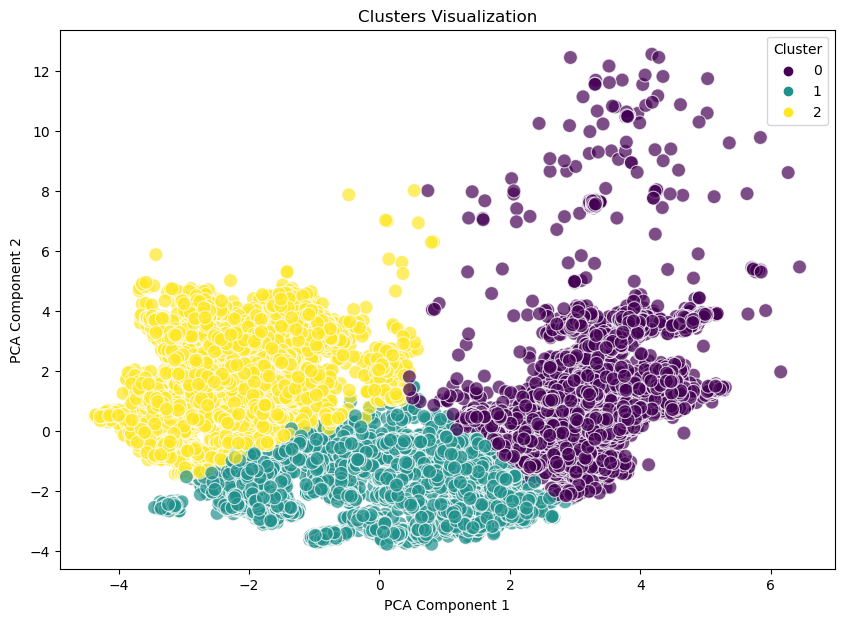

In [18]:
# Visualization: Reduce dimensions to 2D using PCA and plot the clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_train_data = pca.fit_transform(scaled_train_data)

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_train_data[:,0], y=pca_train_data[:,1], hue=train_data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()